In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import svm 
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [11]:
cell_df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv")
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [12]:
cell_df['Class'].unique
#two classes

<bound method Series.unique of 0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64>

In [13]:
cell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [27]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int32
dtype: object

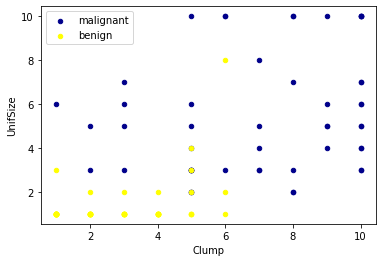

In [28]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant')
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

## Features and Split Data

In [29]:
features = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
features = np.asarray(features)

cell_df['Class'] = cell_df['Class'].astype('int')
labels = np.asarray(cell_df['Class'])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=4)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset)/len(labels),2))

0.6
0.2
0.2


# Train the Support Vector Classifier

In [31]:
sv = svm.SVC(kernel='rbf')
sv.fit(X_train, y_train)
y_pred_test = sv.predict(X_test)

In [32]:
sv_matrix = confusion_matrix(y_test, y_pred_test, labels=[2,4])

In [33]:
np.set_printoptions(precision=2)

In [34]:
classification_report(y_test, y_pred_test)

'              precision    recall  f1-score   support\n\n           2       0.99      0.95      0.97        82\n           4       0.93      0.98      0.96        55\n\n    accuracy                           0.96       137\n   macro avg       0.96      0.97      0.96       137\nweighted avg       0.96      0.96      0.96       137\n'

In [35]:
 """This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True' """
    
    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



Confusion matrix, without normalization
[[78  4]
 [ 1 54]]


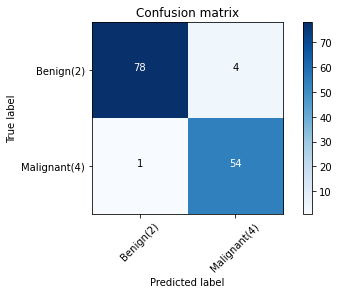

In [36]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(sv_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')


In [37]:
#or
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred_test, average='weighted'))

0.9636480863538998


In [38]:
#or
from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(y_test, y_pred_test))

0.9635036496350365


c:\users\rahel\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Normalized confusion matrix
[[0.95 0.05]
 [0.02 0.98]]


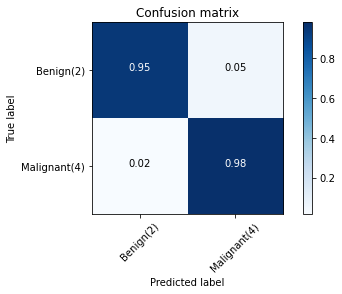

In [39]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(sv_matrix, classes=['Benign(2)','Malignant(4)'],normalize= True,  title='Confusion matrix')

# Gridsearch

Finding the right parameters (like what C or gamma values to use) is a tricky task! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! 


In [41]:
def print_results(results):
    print('Best PARAMS: {}\n'.format(results.best_params_))
    means=results.cv_results_['mean_test_score']
    stds=results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}' .format(round(mean,3), round(std*2,3), params))

In [43]:
svc=svm.SVC()
parameters={
        'kernel':['linear', 'rbf'],
         'C': [0.1,1, 10, 100, 1000],
         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}

In [55]:
cv=GridSearchCV(svc, parameters, cv=5,refit=True,verbose=3)
cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.976, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.963, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.963, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.988, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.975, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.659, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.659, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.659, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.659, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.654, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.976, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.963, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.951, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] .

[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.976, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.963, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.963, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.988, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.988, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.976, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.963, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] .

[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.988, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.975, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.976, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.963, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.963, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.988, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.988, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   12.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [49]:
print_results(cv)

Best PARAMS: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}

0.973 (+/-0.018) for {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
0.658 (+/-0.003) for {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.973 (+/-0.018) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
0.944 (+/-0.029) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.973 (+/-0.018) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
0.983 (+/-0.012) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.973 (+/-0.018) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
0.963 (+/-0.034) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.973 (+/-0.018) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}
0.658 (+/-0.003) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.971 (+/-0.025) for {'C': 1, 'gamma': 1, 'kernel': 'linear'}
0.875 (+/-0.087) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.971 (+/-0.025) for {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
0.963 (+/-0.034) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.971 (+/-0.025) for {'C': 1, 'gamma': 0.01,

In [56]:
print(cv.best_estimator_)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [57]:
print(cv.best_params_)

{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}


In [54]:
scores = cross_val_score(svc, X_train, y_train, cv=5)
scores

array([0.98, 0.98, 0.98, 0.99, 0.99])

In [58]:
print(confusion_matrix(y_test,cv.predict(X_test)))

[[78  4]
 [ 2 53]]


In [60]:
print(classification_report(y_test,cv.predict(X_test)))

              precision    recall  f1-score   support

           2       0.97      0.95      0.96        82
           4       0.93      0.96      0.95        55

    accuracy                           0.96       137
   macro avg       0.95      0.96      0.95       137
weighted avg       0.96      0.96      0.96       137

